In [2]:
import pandas as pd
pd.options.display.max_columns = 100

In [3]:
GYD_muts_df = pd.read_pickle("./data/GYD_df.pkl")
GYD_muts_df.shape

(163, 52)

In [12]:
pdb_serial = "P69783"
cnt = 0
for mut_details in GYD_muts_df[GYD_muts_df["mutation target annotation"].str.contains("crr")]["Details"]:
    s = mut_details.split(' ')[0]
    print(pdb_serial + ' ' + s.split(' ')[0])
    cnt += 1
print(cnt)

P69783 I34T
P69783 F72V
P69783 P138Q
P69783 G93S
P69783 G48V
P69783 G50S
P69783 E44V
P69783 P138Q
P69783 F72V
P69783 D39H
10


,count,type,proportion
0,1.0,stability,0.1
3,1.0,PTS EIIA type-1 domain stability frsA interface,0.1
1,3.0,PTS EIIA type-1 domain frsA interface,0.3
2,5.0,PTS EIIA type-1 domain stability,0.5


Text(0.5, 0, 'mutation type count')

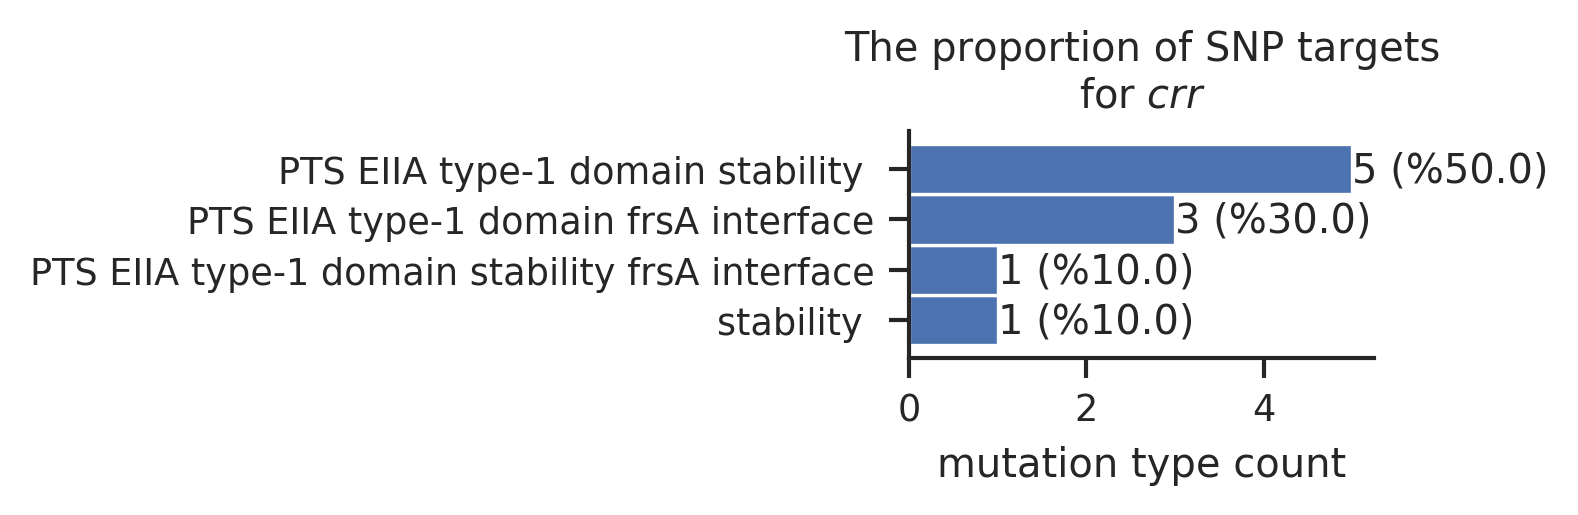

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")

df = pd.DataFrame()
df = df.append({"type":"stability ","count":1},ignore_index=True)
df = df.append({"type":"PTS EIIA type-1 domain frsA interface","count":3},ignore_index=True)
df = df.append({"type":"PTS EIIA type-1 domain stability ","count":5},ignore_index=True)
df = df.append({"type":"PTS EIIA type-1 domain stability frsA interface","count":1},ignore_index=True)
df["proportion"] = df['count'].apply(lambda cnt: cnt/sum(df["count"]))
df = df.sort_values(by="count", ascending=True)
display(df)

ax = df.plot.barh(
    y="count",
    x="type",
    color="#4C72B0",
    figsize=(2,1),
    width=1
)

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows(): 
    s = str(int(r["count"])) +' (%{0:.1f})'.format(r["proportion"] * 100)
    ax.text(r["count"], i-0.25,  s)
sns.despine(ax=ax, top=True, right=True)
ax.get_legend().remove()
ax.set_title("The proportion of SNP targets\nfor $\it{crr}$")
ax.set_ylabel('')
ax.set_xlabel("mutation type count")

In [10]:
bin_df = pd.read_csv("./data/crr_muts_export.csv")
bin_df = bin_df.drop([10])  # for whatever reason, an extra row is being added 
bin_df

,is stability,is conserved,is interface
0,stability,conserved,NaN
1,stability,conserved,frsA interface
2,,NaN,frsA interface
3,stability,conserved,NaN
4,stability,conserved,NaN
5,,conserved,frsA interface
6,,conserved,frsA interface
7,stability,conserved,NaN
8,stability,conserved,NaN
9,stability,conserved,NaN


In [18]:
bin_df= bin_df.fillna(0)
bin_df= bin_df.applymap(lambda c: 0 if c == ' ' else c)
bin_df= bin_df.applymap(lambda c: 1 if c != 0 else c)
bin_df=bin_df.rename(columns={"is stability": "stability", "is conserved": "conserved", "is interface": "$\it{frsA}$ interface"})
bin_df

,stability,conserved,$\it{frsA}$ interface
0,1,1,0
1,1,1,1
2,0,0,1
3,1,1,0
4,1,1,0
5,0,1,1
6,0,1,1
7,1,1,0
8,1,1,0
9,1,1,0


Text(168.44536423841058, 0.5, '')

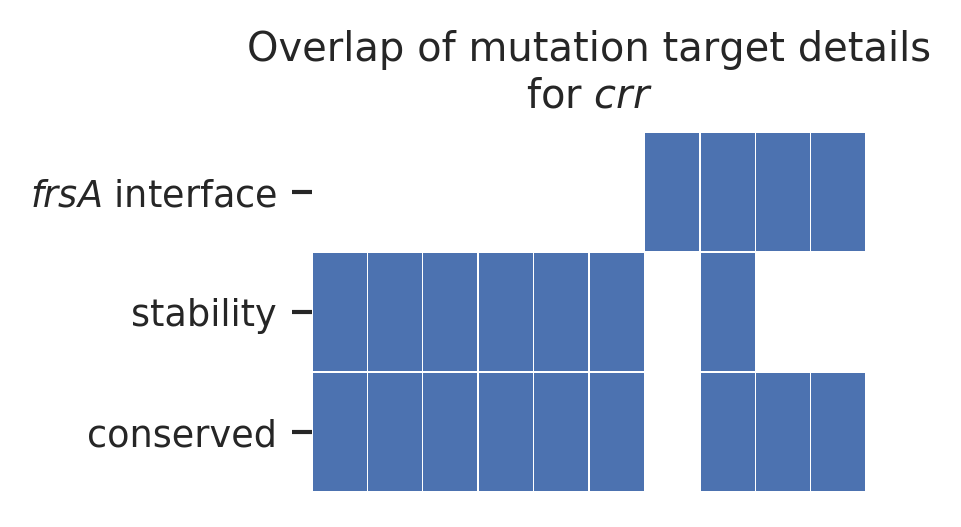

In [19]:
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")

from matplotlib.colors import LinearSegmentedColormap
myColors = ('#FFFFFF', "#4C72B0")
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

g = sns.clustermap(
    bin_df.T,
    linewidths=0.1,
    cmap=cmap,
    xticklabels=False,
#     yticklabels=False,
    figsize=(3,2)
)
g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
ax = g.ax_heatmap
g.ax_heatmap.set_title(
    "Overlap of mutation target details\nfor $\it{crr}$",
    y=1.1
)
# ax.set_title("The proportion of SNP targets)
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('')